# Loading data sets:

In [104]:
import pandas as pd
import numpy as np

In [105]:
comments= pd.read_csv("C:/Users/DELL/OneDrive/Documents/GitHub/PPPD201920_Students_MAT/PracaDomowa/PracaDomowa 5/comments.csv")
posts   = pd.read_csv("C:/Users/DELL/OneDrive/Documents/GitHub/PPPD201920_Students_MAT/PracaDomowa/PracaDomowa 5/posts.csv")
users   = pd.read_csv("C:/Users/DELL/OneDrive/Documents/GitHub/PPPD201920_Students_MAT/PracaDomowa/PracaDomowa 5/users.csv")

## Task 1:
### Draw a histogram of the number *Comments* on the posts.
### Narysuj histogram liczby odpowiedzi (Comments) na post.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF9DD2FEF0>]],
      dtype=object)

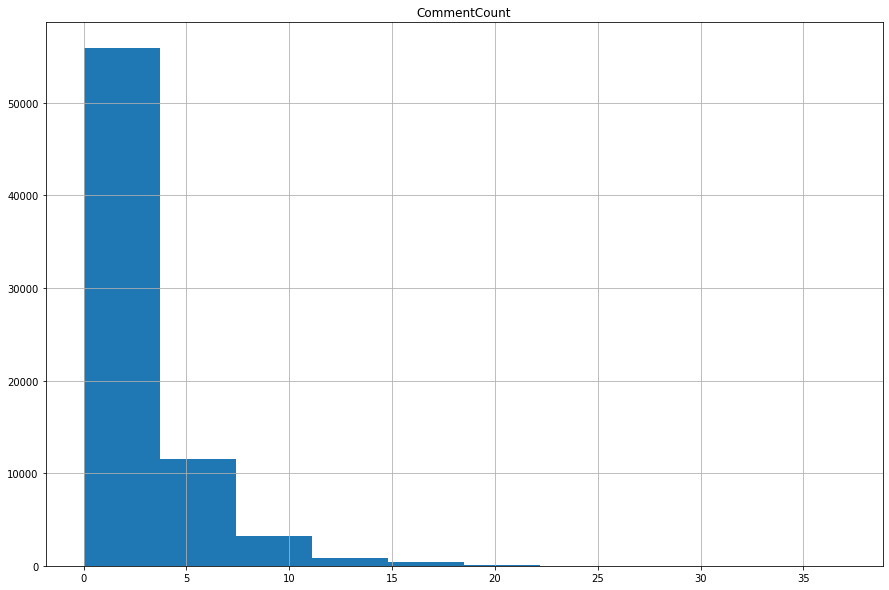

In [106]:
# The first approach: based on data frame posts:
posts.hist('CommentCount',figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF9DB3AAC8>]],
      dtype=object)

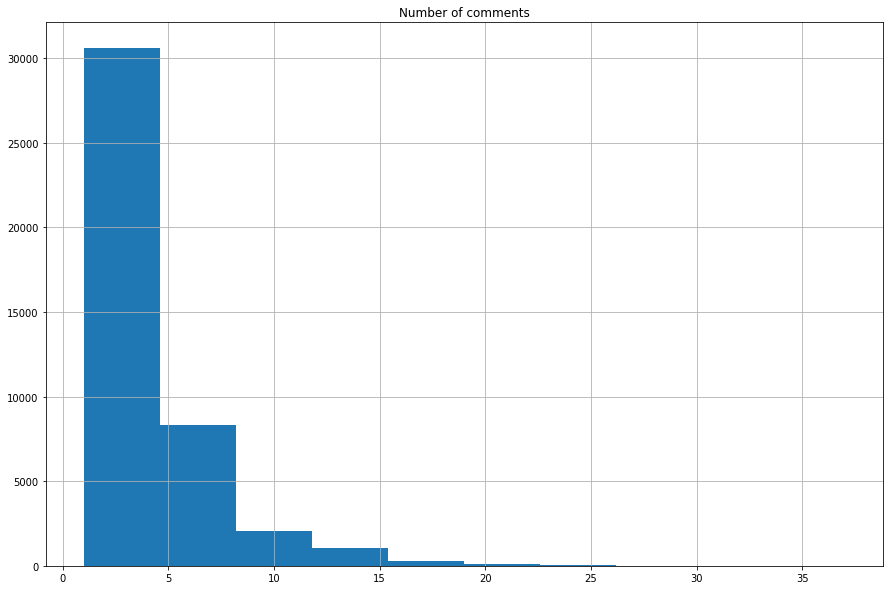

In [107]:
# Second approach: based on data frame comments:
df1= comments.groupby("PostId").count()\
        .reset_index().drop(["Id","Score","UserId"],axis=1)\
        .rename(columns={"CreationDate":"Number of comments"})

# Draw the histogram:
df1.hist("Number of comments",figsize=(15,10))

##### I read the description of data sets but I still have the ambiguity in the understanding for this task. Hence, I propose two possible solutions for this task

## Task 2

### Output the name (DisplayName, not Id!) of the user who has the highest total number of views for his posts. Tip: To extract the appropriate OwnerUserId from Posts you can use .loc, .iloc or .values.

### Wypisz nazwę (DisplayName, nie Id!) użytkownika, dla którego suma wyświetleń jego postów jest największa. Wskazówka: aby wyciągnąć odpowiedni OwnerUserId z Posts można użyć .loc, .iloc lub .values.

In [108]:
posts.groupby("OwnerUserId").sum().reset_index()\
     [["OwnerUserId","ViewCount"]].sort_values("ViewCount",ascending=False).head(1)

# Hence, the user whose userId 101 having the highest total number of views for his posts


,OwnerUserId,ViewCount
67,101.0,1461097.0


In [109]:
users.loc[users["AccountId"]==101]\
     .reset_index()[["DisplayName"]]
# The answer is: "hitec"

,DisplayName
0,hitec


## Task 3

### Display the name of the user who has the second highest number of answers marked as Accepted Solution.

### Wyświetl nazwę użytkownika, który ma drugą największą liczbę odpowiedzi (również znajdujących się w ramce Posts) oznaczonych jako zaakceptowane rozwiązanie.

In [33]:
#  PostTypeId
#          - 1: Question
#          - 2: Answer
#  AcceptedAnswerId (only present if PostTypeId is 1)

In [110]:
# data frame contains AcceptedAnswerId
df3= posts.dropna(subset=["AcceptedAnswerId"])[["AcceptedAnswerId"]]
df3

,AcceptedAnswerId
0,393.0
4,770.0
5,12.0
6,62.0
7,178.0
8,17.0
9,198.0
11,1608.0
14,20.0
22,114.0


In [111]:
df3_1= df3.merge(posts[['Id','OwnerUserId','Score']], left_on='AcceptedAnswerId', right_on='Id')
df3_1

,AcceptedAnswerId,Id,OwnerUserId,Score
0,393.0,393,74.0,7
1,770.0,770,330.0,13
2,12.0,12,9.0,49
3,62.0,62,40.0,9
4,178.0,178,101.0,20
5,17.0,17,26.0,107
6,198.0,198,101.0,24
7,1608.0,1608,78.0,7
8,20.0,20,30.0,58
9,114.0,114,68.0,42


In [112]:
# Finding the Id of user having the second highest number of answers marked as Accepted Solution
Id_needed_to_find =df3_1.groupby("OwnerUserId").count()\
     ["Score"].sort_values(ascending=False)\
     .reset_index().head(2).iloc[1,0]

Id_needed_to_find

1893.0

In [113]:
users[users["Id"]==Id_needed_to_find]["DisplayName"]

# The answer is 'jpatokal'

1789    jpatokal
Name: DisplayName, dtype: object

## Task 4:
### Display the percentage of posts for which the accepted answer having lower score than the answer with the highest score.

### Wyświetl odsetek postów, dla których odpowiedź zaakceptowana ma niższy wynik niż odpowiedź o najwyższym wyniku.

In [72]:
#  PostTypeId
#          - 1: Question
#          - 2: Answer
#  ParentID (only present if PostTypeId is 2: equivalent to this post is an answer)

In [114]:
# Finding the answers out of posts:
df_4_answers= posts.dropna(subset=["ParentId"])[["Id","Score","ParentId","OwnerUserId"]]
df_4_answers

,Id,Score,ParentId,OwnerUserId
2,3,12,2.0,9.0
10,12,49,6.0,9.0
15,17,107,10.0,26.0
16,18,16,10.0,35.0
17,19,10,16.0,33.0
18,20,58,16.0,30.0
19,22,11,16.0,26.0
20,23,12,10.0,19.0
21,24,15,10.0,23.0
26,29,10,25.0,26.0


In [115]:
# Finding the accepted answers:
df_4_accepted_answers = df_4_answers.merge(posts[["AcceptedAnswerId"]],left_on="Id",right_on="AcceptedAnswerId")


In [116]:
# We merge between 2 data frames: df_4_accepted_answers and df_4_answers:
score_comparison = df_4_accepted_answers.merge(df_4_answers,left_on="ParentId",right_on="ParentId")
numbers_found= score_comparison[score_comparison["Score_x"]<score_comparison["Score_y"]].shape[0]
numbers_found

1255

In [117]:
# Finding number of posts:
number_of_posts= posts.loc[posts.PostTypeId==1].shape[0]
number_of_posts

25346

In [118]:
# Finally, the percentage of posts for which the accepted answer having lower score than the answer with the highest score:

numbers_found/number_of_posts*100

4.9514716326047505